# Time Series Forecasting - SARIMAX Model
### begin with importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt   # plotting the graphs
import numpy as np                # for math

from datetime import datetime     # to access datetime
from pandas import Series         # to work on series

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from matplotlib import rcParams
rcParams['figure.figsize'] = [15,6]

import warnings
warnings.filterwarnings('ignore')

C:\Users\gmwin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ss_data = pd.read_csv(r"C:\Users\gmwin\Desktop\Data Analytics Projects\Super Store Project\Super_Store_technology_subquery.csv")

# Need to do some basic data transformation and subsetting

In [3]:
# need to do some basic data transformation and subsetting
ss_data.head()

,Order_Date,Year,Total_Month_Sales
0,1/1/2014,2014,3143.290
1,2/1/2014,2014,1608.510
2,3/1/2014,2014,32511.174
3,4/1/2014,2014,9195.434
4,5/1/2014,2014,9599.876


In [4]:
new_df = ss_data.drop('Year', axis='columns')
new_df['Order_Date'] = pd.to_datetime(new_df['Order_Date'])
new_df.set_index('Order_Date', inplace=True)
new_df.head()

,Total_Month_Sales
Order_Date,
2014-01-01,3143.290
2014-02-01,1608.510
2014-03-01,32511.174
2014-04-01,9195.434
2014-05-01,9599.876


<AxesSubplot:xlabel='Order_Date'>

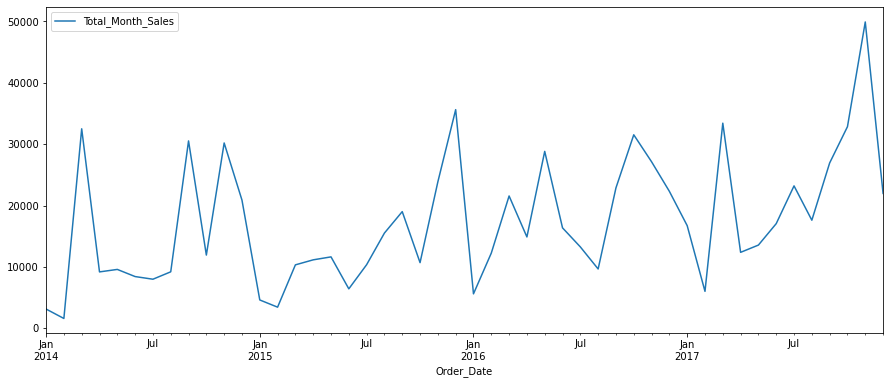

In [5]:
new_df.plot()

In [6]:
def ADF_test(column):
    results = adfuller(column, autolag = 'AIC')
    print("1. ADF: ",results[0] )
    print("2. P-Value ", results[1])
    print("3. Num of Lags: ", results[2])
    print("4. Num of Obesrvations Used For ADF Regression and Critical Values Calculation: ", results[3])
    print("5. Critical Values: ")
    for k, v in results[4].items():
        print("\t", k, ": ", v)
    

In [7]:
ADF_test(new_df)

1. ADF:  -5.5227611037268955
2. P-Value  1.8615967302063814e-06
3. Num of Lags:  0
4. Num of Obesrvations Used For ADF Regression and Critical Values Calculation:  47
5. Critical Values: 
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064


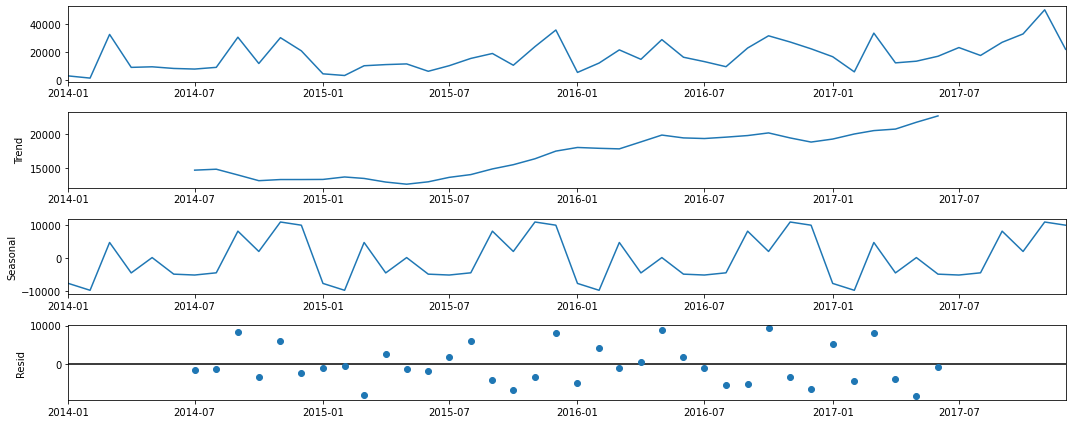

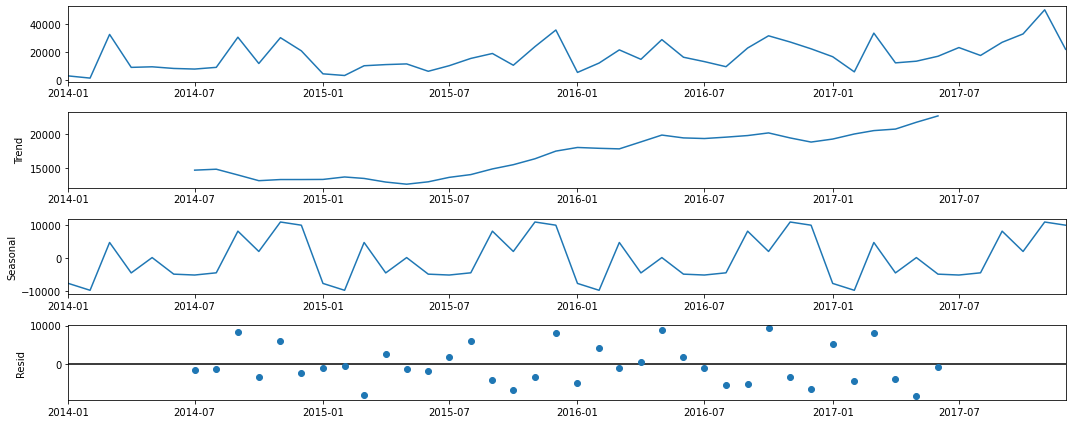

In [8]:
# need to decompose the time series

decompose_df = seasonal_decompose(new_df, model='additive')
decompose_df.plot()

<AxesSubplot:xlabel='Order_Date'>

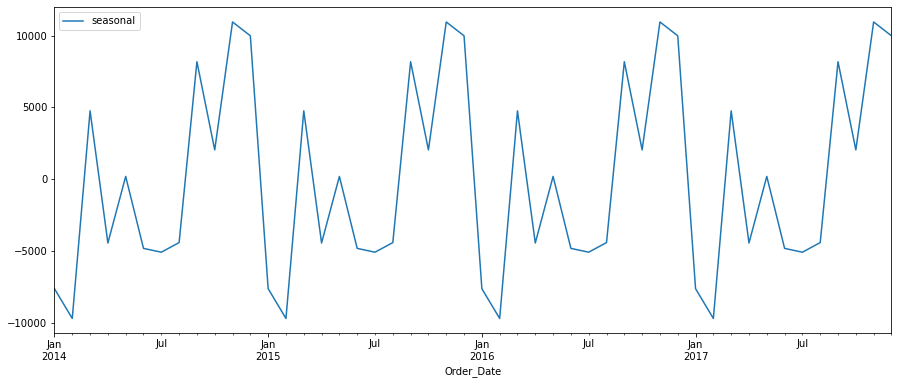

In [9]:
seasonality = pd.DataFrame(decompose_df.seasonal)
seasonality.plot()

In [10]:
#want to double check the series is stationary
ADF_test(seasonality)

1. ADF:  -489308974741239.25
2. P-Value  0.0
3. Num of Lags:  10
4. Num of Obesrvations Used For ADF Regression and Critical Values Calculation:  37
5. Critical Values: 
	 1% :  -3.6209175221605827
	 5% :  -2.9435394610388332
	 10% :  -2.6104002410518627


In [11]:
seasonality['rev'] = seasonality['seasonal']

In [12]:
model=sm.tsa.statespace.SARIMAX(seasonality['rev'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

In [13]:
model=sm.tsa.statespace.SARIMAX(new_df['Total_Month_Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

<AxesSubplot:xlabel='Order_Date'>

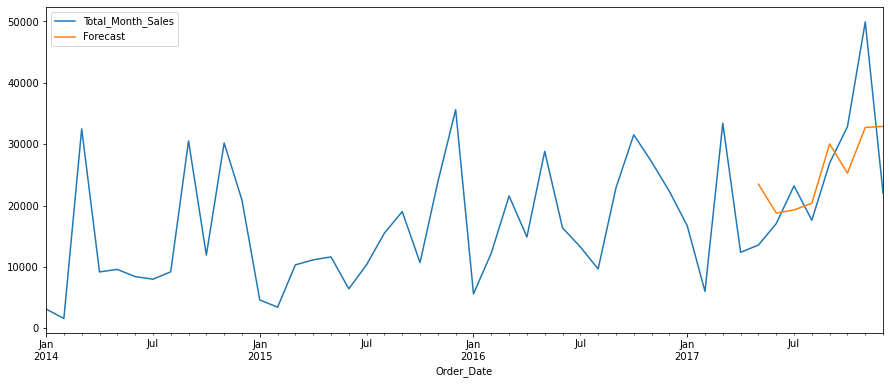

In [14]:
new_df['Forecast'] = results.predict(start=40, end=60, dynamic=True)
new_df[['Total_Month_Sales', 'Forecast']].plot()

In [15]:
from pandas.tseries.offsets import DateOffset
pred_date = [new_df.index[-1]+ DateOffset(months=x) for x in range(0,25)]

In [16]:
pred_date = pd.DataFrame(index=pred_date[1:], columns=new_df.columns)
pred_date

,Total_Month_Sales,Forecast
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN
2018-06-01,NaN,NaN
2018-07-01,NaN,NaN
2018-08-01,NaN,NaN
2018-09-01,NaN,NaN
2018-10-01,NaN,NaN


In [17]:
new_df = pd.concat([new_df, pred_date])

In [18]:
new_df['Forecast'] = results.predict(start=42, end=120, dynamic=True)

## Plotting the forecast with a user-defined function

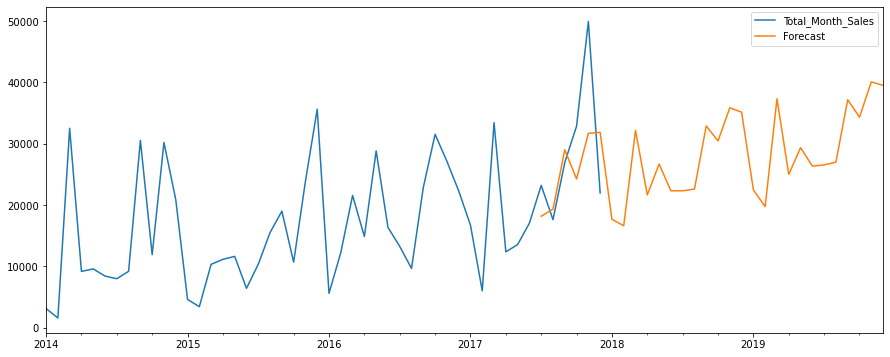

In [19]:
def plot_fx(dataframe):
    dataframe.plot()
    
plot_fx(new_df)

In [20]:
new_df['Yearly Sum'] = new_df['Forecast'].rolling('365D').sum()

In [21]:
total_revenue_2018 = new_df['Yearly Sum'].loc['2018-12-01']
total_revenue_2019 = new_df['Yearly Sum'].loc['2019-12-01']
print('Total forecasted revenue for 2018 is: $' + str(int(total_revenue_2018)))
print('Total forecasted revenue for 2019 is: $' + str(int(total_revenue_2019)))

Total forecasted revenue for 2018 is: $316444
Total forecasted revenue for 2019 is: $364850
